<h1><u><center>Credit Card Fraud Detection</center></u></h1>

Based on: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Dataset information

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #we going to make a logistical regression model

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from sklearn.metrics import top_k_accuracy_score

### importing the dataset:

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
#the first 5 rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#the 5 last rows of the dataset
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
data.describe() #provides statistical information

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.info() #provide some info about the dataframe like data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<hr>
we don't have missing values

#### another way to see the same thing is:

In [10]:
data.isnull().values.any()

False

<hr>

([<matplotlib.axis.XTick at 0x7f81a4264580>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

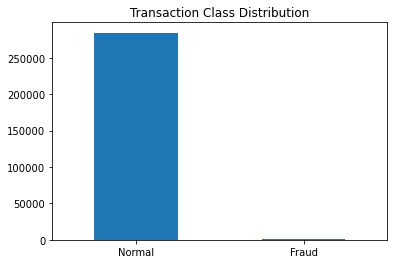

In [11]:
LABELS=['Normal','Fraud']
count_classes =pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot =0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), LABELS)
#plt.xlabels("Class")
#plt.ylabel("Frequency")

<AxesSubplot:xlabel='Amount', ylabel='Density'>

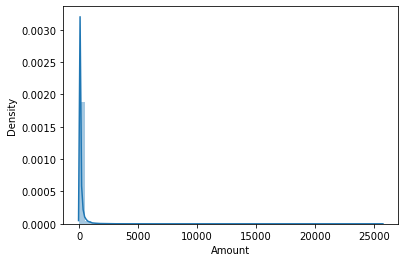

In [12]:
sns.distplot(data['Amount'])

<blockquote>the data of the column 'Amonunt' are concentrated in the left tail of the distribution</blockquote>

<AxesSubplot:xlabel='Time', ylabel='Density'>

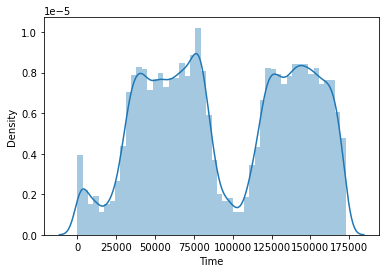

In [13]:
sns.distplot(data['Time'])

<AxesSubplot:>

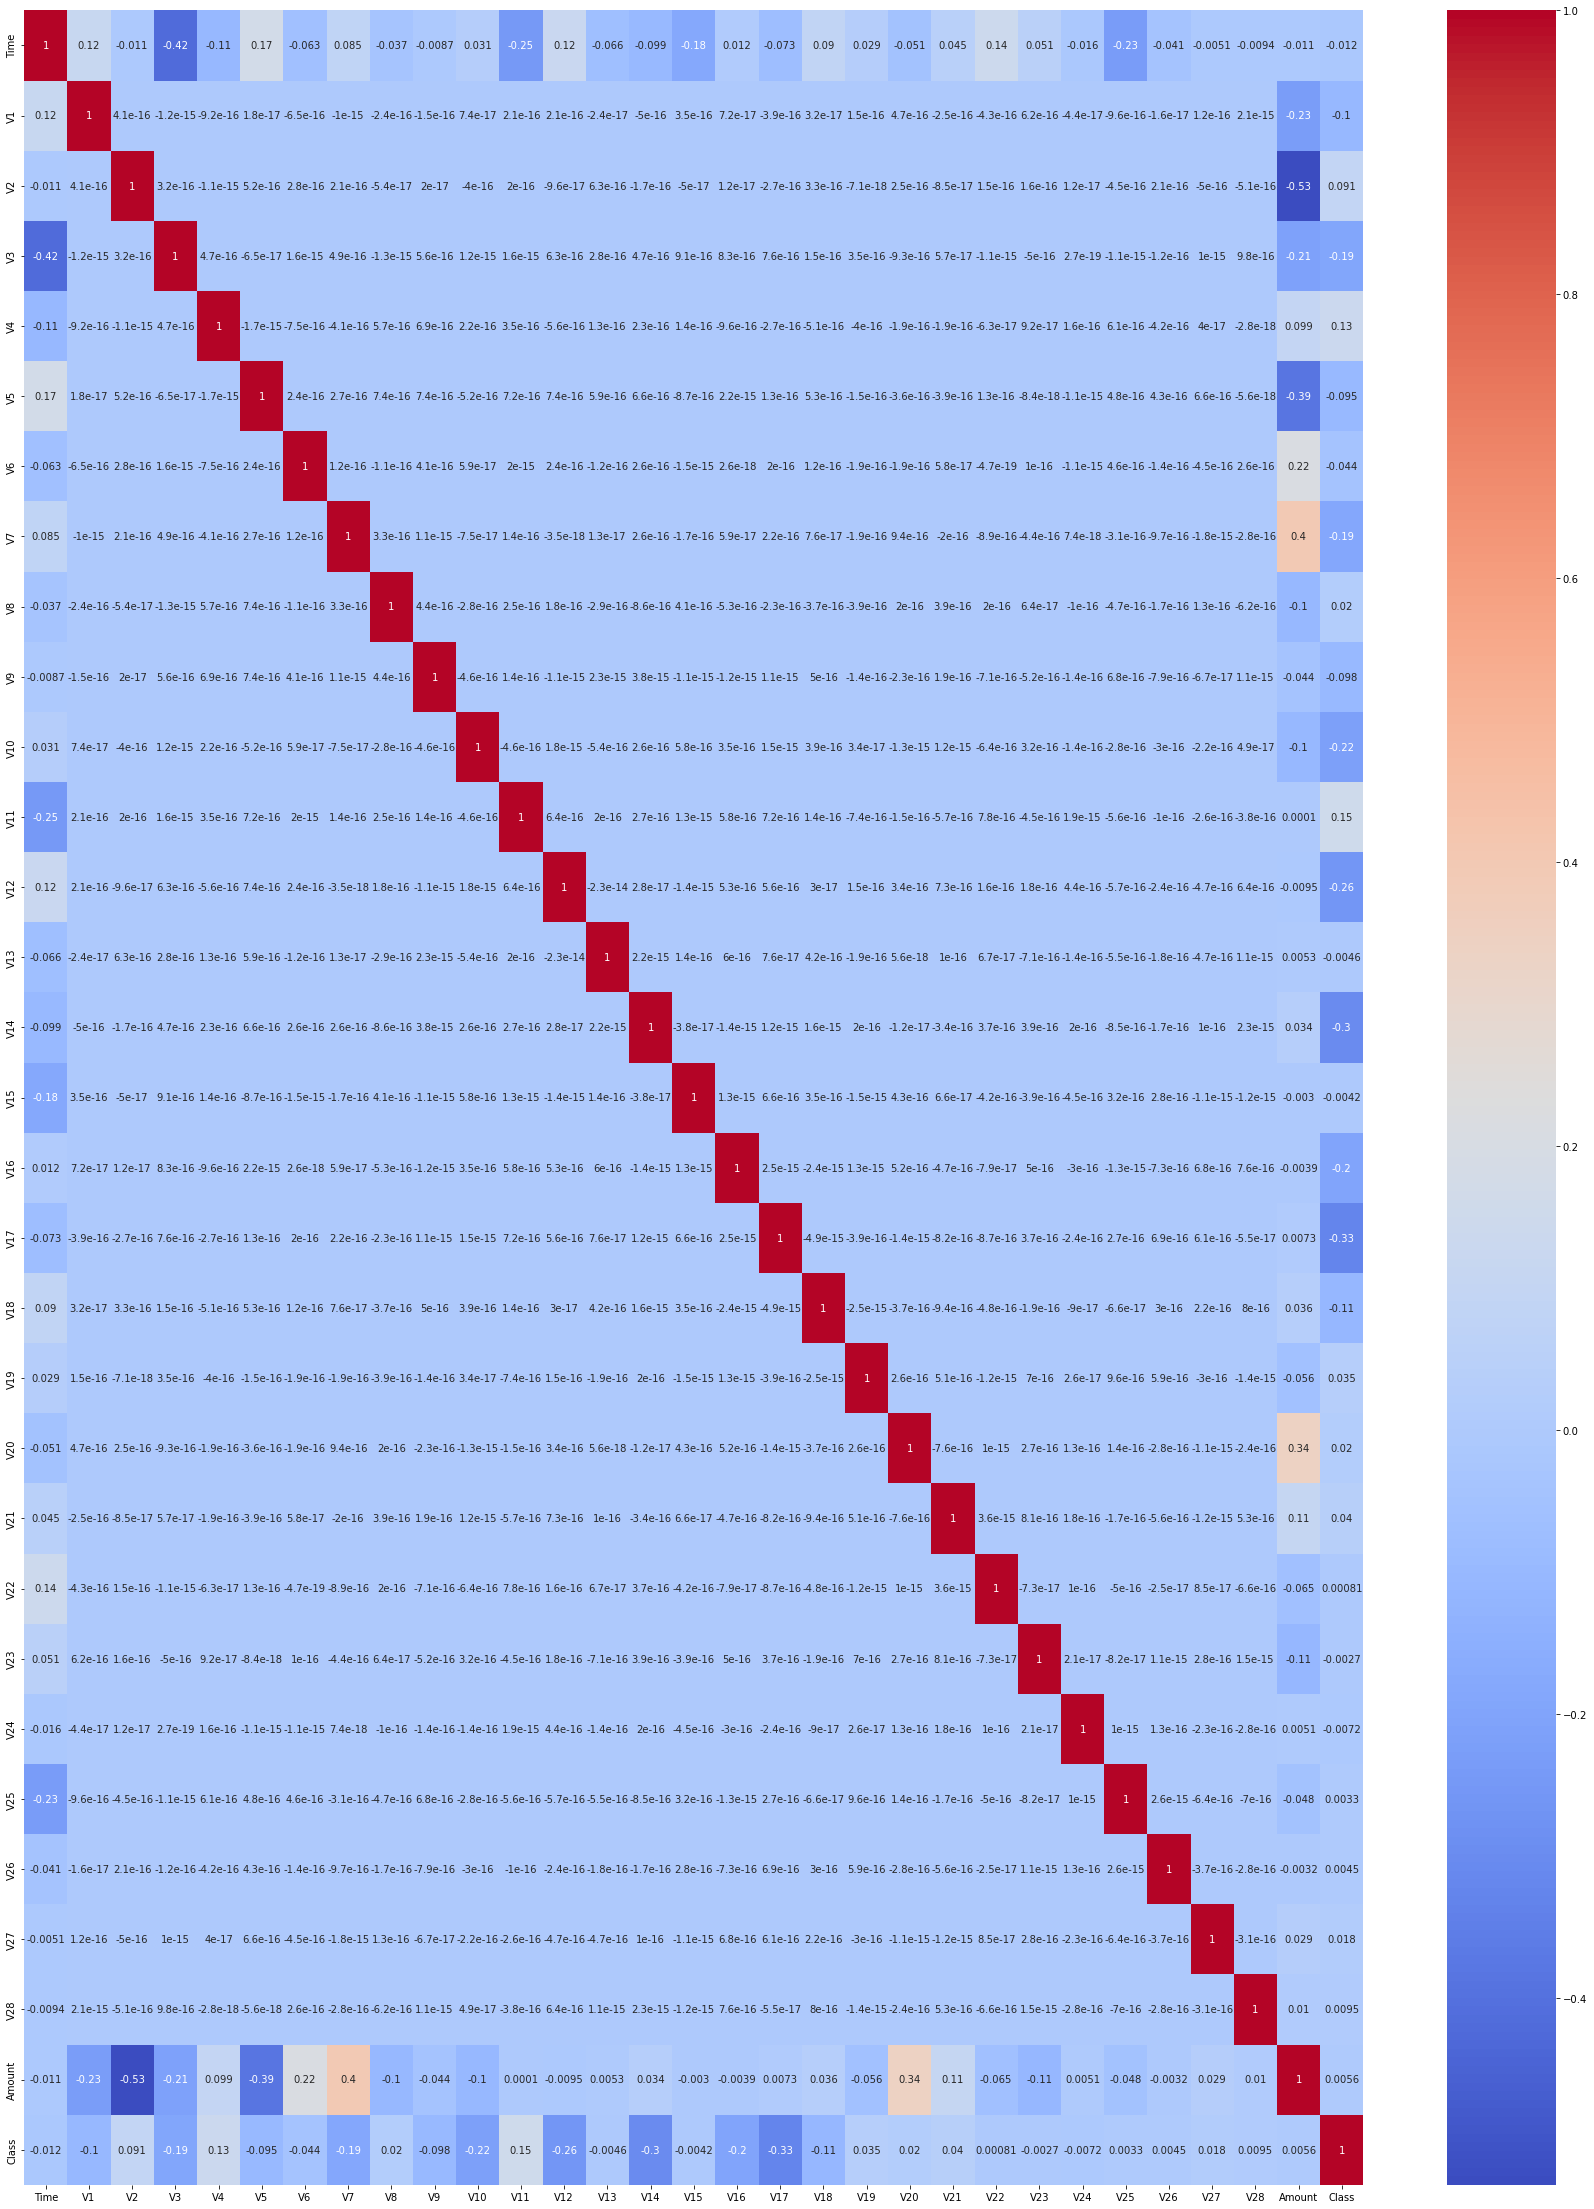

In [14]:
corr = data.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap ='coolwarm')

We do nothing about the last graph becouse it's ok

In [15]:
#distribution of legit transaction & fraudulent transactions
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class is a dummie variable that indicates if was a fraudulent transaction or a legit transaction

<blockquote>reallity is that we have 284315 legit transactions and 492 fraudulent transactions</blockquote>

<blockquote>This means that 0 is a normal transaction and 1 is a fraudulent transaction on our Class variable in the dataset</blockquote>

In [16]:
#separating the data for analysis 
legit = data[data.Class == 0] #all rows and its corresponding columns that are legit
fraud = data[data.Class == 1] #all rows and its corresponding columns that are fraudulent

In [17]:
#We check the shape of the dataframes
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [18]:
legit.Amount.describe() #look that Amount is the name of a column

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<hr>
<p><b>count</b> is the total data we have on the dataframe</p>
<p><b>mean</b> is the mean of transactions values</p>
<hr>

In [19]:
fraud.Amount.describe() 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
#compare the values for both transactions 
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


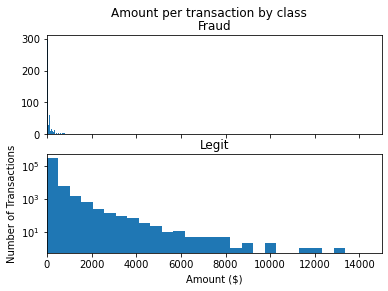

In [21]:
f, (ax1,ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Amount per transaction by class')
bins=50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,15000))
plt.yscale('log')
plt.show();

<hr>
Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of fraudulent transactions --> 492

In [23]:
#.sample return a random sample of items from an axis of object.
#n parameter = Number of items from axis to return.
legit_sample = legit.sample(n=492)

#### concatenating two DataFrames:
Both (legit and fraud), has the same numbers of rows now

In [24]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [25]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
190218,128742.0,1.852983,0.181261,-0.297784,3.846818,0.163270,0.873029,-0.412683,0.323396,-0.338355,...,0.117888,0.496632,0.122152,0.737151,0.046999,0.082744,-0.019475,-0.052314,1.51,0
79732,58150.0,1.329053,-0.678695,-0.085889,-0.674026,-0.745411,-0.595130,-0.388200,-0.090035,-0.868321,...,0.194163,0.450618,-0.242525,0.027865,0.759212,-0.062999,-0.026560,-0.004700,50.00,0
240030,150396.0,2.185023,-1.811325,-0.199531,-1.539064,-1.803088,0.100647,-1.861854,0.133012,-0.443084,...,-0.154832,-0.040349,0.319757,0.424398,-0.526907,-0.264448,0.049349,-0.020315,54.00,0
172641,121183.0,2.140221,-0.802254,-1.384454,-1.037432,-0.422334,-0.870754,-0.369197,-0.302715,-0.851195,...,0.506187,1.417862,-0.102644,-0.250663,0.216553,0.069730,-0.040812,-0.070625,45.85,0
189837,128579.0,-0.629317,0.772905,1.377229,-0.962690,0.980905,-0.455294,1.222018,-0.237498,-0.644468,...,-0.304267,-0.781862,-0.391788,-0.338316,0.480825,0.292419,-0.217947,-0.194154,0.99,0


In [26]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [27]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [28]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97445.373984,0.018856,0.092313,-0.037162,-0.049325,0.004938,-0.003393,0.049249,-0.047207,-0.044439,...,-0.023564,0.018177,0.012993,0.003549,-0.006307,0.006573,-0.046488,-0.008586,0.015562,86.644573
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<hr>
Splitting the data into Features & Target

In [29]:
X = new_dataset.drop(columns='Class', axis=1) #axis =1 to drop columns 
#X represent the rest of the dataset without Class
Y = new_dataset['Class'] #Y it's a dummie (takes values of 0 or 1) and represent the Class (legit =0, fraudulent=1)

In [30]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
190218  128742.0  1.852983  0.181261 -0.297784  3.846818  0.163270  0.873029   
79732    58150.0  1.329053 -0.678695 -0.085889 -0.674026 -0.745411 -0.595130   
240030  150396.0  2.185023 -1.811325 -0.199531 -1.539064 -1.803088  0.100647   
172641  121183.0  2.140221 -0.802254 -1.384454 -1.037432 -0.422334 -0.870754   
189837  128579.0 -0.629317  0.772905  1.377229 -0.962690  0.980905 -0.455294   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [31]:
print(Y) #

190218    0
79732     0
240030    0
172641    0
189837    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


<hr>
Split the data into Training data & Testing data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=2)

In [33]:
print(X.shape,X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### Model training 

Logistic Regression

In [ ]:
model = LogisticRegression()
#training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
#Testing the Logistic Regression
from sklearn.metrics import f1_score
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

Other type of model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
#training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
#Testing the Logistic Regression
from sklearn.metrics import f1_score
Y_pred = model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

### Model Evaluation

Accuarcy Score

In [ ]:
#accuarcy on training data
X_train_prediction = model.predict(X_train)
training_data_accuarcy = accuarcy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuarcy on Training data:", training_data accuarcy)

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuarcy = acuarcy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuarcy score on Test Data:', test_data_accuarcy)